<a href="https://colab.research.google.com/github/21-501/ds1/blob/main/i3code_digitclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    import keras
except ImportError:
    import os
    os.system('pip install keras')

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras import backend as K


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Conversion of class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(f"x_train shape: {x_train.shape}")
print(f"{x_train.shape[0]} train samples")
print(f"{x_test.shape[0]} test samples")

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the bot as mnist.h5")

Epoch 1/10
469/469 [==============================] - 180s 383ms/step - loss: 2.2789 - accuracy: 0.1607 - val_loss: 2.2508 - val_accuracy: 0.3840
Epoch 2/10
469/469 [==============================] - 172s 366ms/step - loss: 2.2317 - accuracy: 0.2876 - val_loss: 2.1910 - val_accuracy: 0.5464
Epoch 3/10
469/469 [==============================] - 169s 361ms/step - loss: 2.1662 - accuracy: 0.4059 - val_loss: 2.1048 - val_accuracy: 0.6432
Epoch 4/10
469/469 [==============================] - 177s 377ms/step - loss: 2.0716 - accuracy: 0.4933 - val_loss: 1.9786 - val_accuracy: 0.6872
Epoch 5/10
469/469 [==============================] - 170s 363ms/step - loss: 1.9337 - accuracy: 0.5509 - val_loss: 1.7998 - val_accuracy: 0.7123
Epoch 6/10
469/469 [==============================] - 167s 356ms/step - loss: 1.7519 - accuracy: 0.5926 - val_loss: 1.5734 - val_accuracy: 0.7298
Epoch 7/10
469/469 [==============================] - 168s 357ms/step - loss: 1.5416 - accuracy: 0.6250 - val_loss: 1.3297 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8175297379493713
Test accuracy: 0.8205000162124634


KNN NEIGHBOUR

In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0


11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto', n_jobs=10)


In [3]:
# Train the KNN classifier
knn.fit(X_train, y_train)


KNeighborsClassifier(n_jobs=10)

In [4]:
# Save the trained classifier using pickle
with open('knn_classifier.pkl', 'wb') as f:
    pickle.dump(knn, f)


In [5]:
# Make predictions on the validation set
y_val_pred = knn.predict(X_test)
train_accuracy = accuracy_score(y_test, y_val_pred)

# Generate the confusion matrix for the validation set
train_confusion_matrix = confusion_matrix(y_test, y_val_pred)

print(f"KNN Trained Classifier Confidence: {train_accuracy}")
print(f"Confusion Matrix: \n{train_confusion_matrix}")


KNN Trained Classifier Confidence: 0.9688
Confusion Matrix: 
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


In [6]:
# Make predictions on the test set
test_predictions = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Generate the confusion matrix for the test set
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

print(f"Accuracy of Classifier on Test Images: {test_accuracy}")
print(f"Confusion Matrix for Test Data: \n{test_confusion_matrix}")


Accuracy of Classifier on Test Images: 0.9688
Confusion Matrix for Test Data: 
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


In [7]:
# Make sample predictions
sample_predictions = knn.predict(X_test[:10])
print(f"Predicted Labels for Test Images: {sample_predictions}")


Predicted Labels for Test Images: [7 2 1 0 4 1 4 9 5 9]


In [8]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


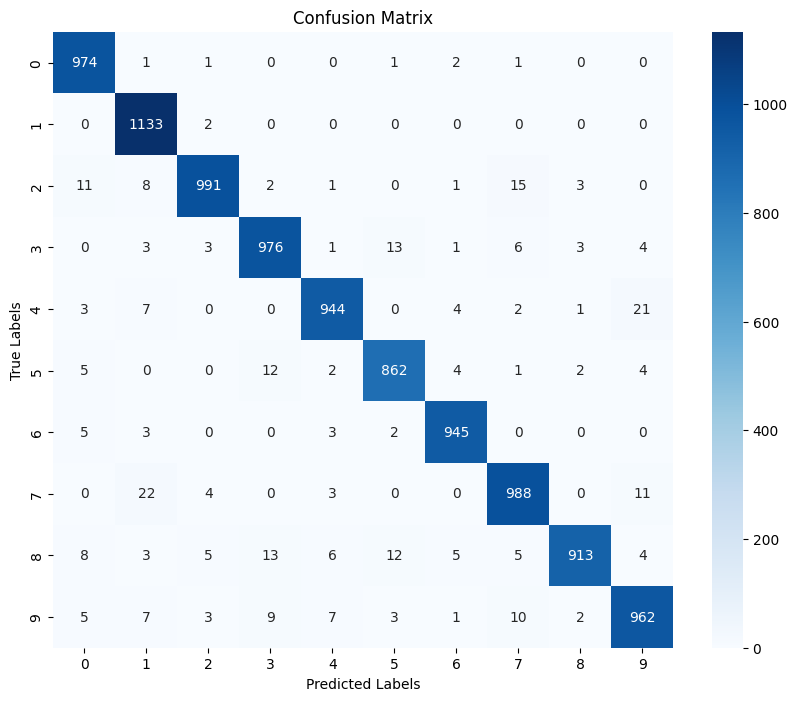

In [9]:
# Plot confusion matrix for the validation set
plot_confusion_matrix(train_confusion_matrix, class_names=np.arange(10))


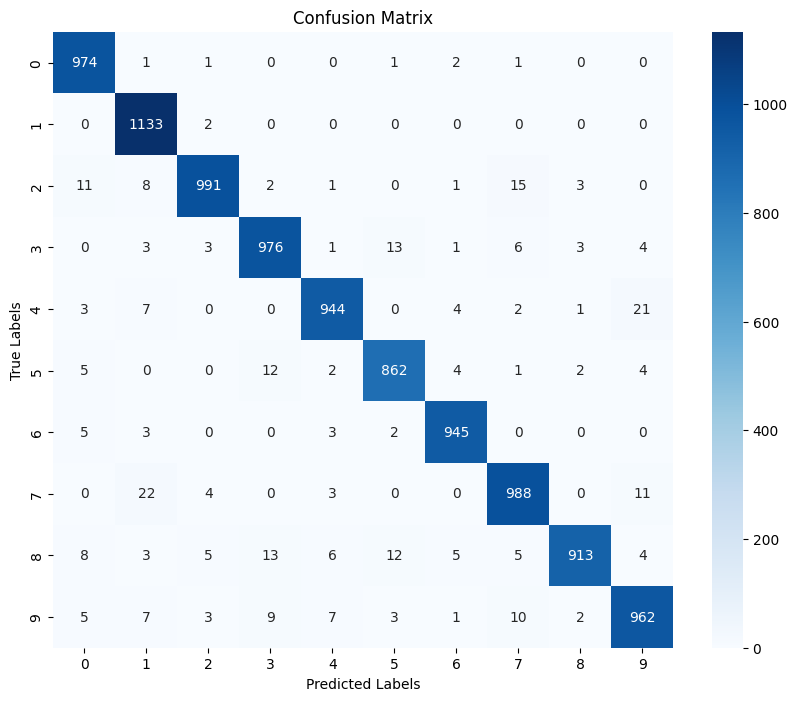

In [10]:
# Plot confusion matrix for the test set
plot_confusion_matrix(test_confusion_matrix, class_names=np.arange(10))


SVM(SUPPORT VECTOR MACHINE)

In [12]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0


In [13]:
# Initialize the SVM classifier
svm = SVC(kernel='linear', C=1, random_state=42)


In [14]:
# Train the SVM classifier
svm.fit(X_train, y_train)


SVC(C=1, kernel='linear', random_state=42)

In [15]:
# Save the trained classifier using pickle
with open('svm_classifier.pkl', 'wb') as f:
    pickle.dump(svm, f)


In [16]:
# Make predictions on the validation set
y_val_pred = svm.predict(X_test)
train_accuracy = accuracy_score(y_test, y_val_pred)

# Generate the confusion matrix for the validation set
train_confusion_matrix = confusion_matrix(y_test, y_val_pred)

print(f"SVM Trained Classifier Confidence: {train_accuracy}")
print(f"Confusion Matrix: \n{train_confusion_matrix}")


SVM Trained Classifier Confidence: 0.9404
Confusion Matrix: 
[[ 957    0    4    1    1    6    9    1    0    1]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   8    6  967   11    3    3    7    8   17    2]
 [   4    3   16  947    1   16    0    9   12    2]
 [   1    1   10    1  942    2    4    2    3   16]
 [  10    4    3   36    6  803   13    1   14    2]
 [   9    2   13    1    5   16  910    1    1    0]
 [   1    8   21   10    8    1    0  957    3   19]
 [   8    4    6   25    7   26    6    7  877    8]
 [   7    7    2   11   33    4    0   18    5  922]]


In [17]:
# Make predictions on the test set
test_predictions = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Generate the confusion matrix for the test set
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

print(f"Accuracy of Classifier on Test Images: {test_accuracy}")
print(f"Confusion Matrix for Test Data: \n{test_confusion_matrix}")


Accuracy of Classifier on Test Images: 0.9404
Confusion Matrix for Test Data: 
[[ 957    0    4    1    1    6    9    1    0    1]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   8    6  967   11    3    3    7    8   17    2]
 [   4    3   16  947    1   16    0    9   12    2]
 [   1    1   10    1  942    2    4    2    3   16]
 [  10    4    3   36    6  803   13    1   14    2]
 [   9    2   13    1    5   16  910    1    1    0]
 [   1    8   21   10    8    1    0  957    3   19]
 [   8    4    6   25    7   26    6    7  877    8]
 [   7    7    2   11   33    4    0   18    5  922]]


In [18]:
# Make sample predictions
sample_predictions = svm.predict(X_test[:10])
print(f"Predicted Labels for Test Images: {sample_predictions}")


Predicted Labels for Test Images: [7 2 1 0 4 1 4 9 6 9]


In [19]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


RANDOM FOREST CLASSIFIER

In [20]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape and normalize the data
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0


In [21]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [22]:
# Train the Random Forest classifier
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:
# Save the trained classifier using pickle
with open('rf_classifier.pkl', 'wb') as f:
    pickle.dump(rf, f)


In [24]:
# Make predictions on the validation set
y_val_pred = rf.predict(X_test)
train_accuracy = accuracy_score(y_test, y_val_pred)

# Generate the confusion matrix for the validation set
train_confusion_matrix = confusion_matrix(y_test, y_val_pred)

print(f"Random Forest Trained Classifier Confidence: {train_accuracy}")
print(f"Confusion Matrix: \n{train_confusion_matrix}")


Random Forest Trained Classifier Confidence: 0.9704
Confusion Matrix: 
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0    9    8    2]
 [   1    0    0    0  955    0    5    1    4   16]
 [   5    1    1    9    2  860    5    2    5    2]
 [   7    3    0    0    3    3  937    0    5    0]
 [   1    4   20    2    0    0    0  989    2   10]
 [   4    0    6    7    5    5    5    4  930    8]
 [   7    6    2   12   12    1    0    4    4  961]]


In [25]:
# Make predictions on the test set
test_predictions = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Generate the confusion matrix for the test set
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

print(f"Accuracy of Classifier on Test Images: {test_accuracy}")
print(f"Confusion Matrix for Test Data: \n{test_confusion_matrix}")


Accuracy of Classifier on Test Images: 0.9704
Confusion Matrix for Test Data: 
[[ 971    0    0    0    0    2    3    1    3    0]
 [   0 1127    2    2    0    1    2    0    1    0]
 [   6    0 1002    5    3    0    3    8    5    0]
 [   1    0    9  972    0    9    0    9    8    2]
 [   1    0    0    0  955    0    5    1    4   16]
 [   5    1    1    9    2  860    5    2    5    2]
 [   7    3    0    0    3    3  937    0    5    0]
 [   1    4   20    2    0    0    0  989    2   10]
 [   4    0    6    7    5    5    5    4  930    8]
 [   7    6    2   12   12    1    0    4    4  961]]


In [26]:
# Make sample predictions
sample_predictions = rf.predict(X_test[:10])
print(f"Predicted Labels for Test Images: {sample_predictions}")


Predicted Labels for Test Images: [7 2 1 0 4 1 4 9 5 9]


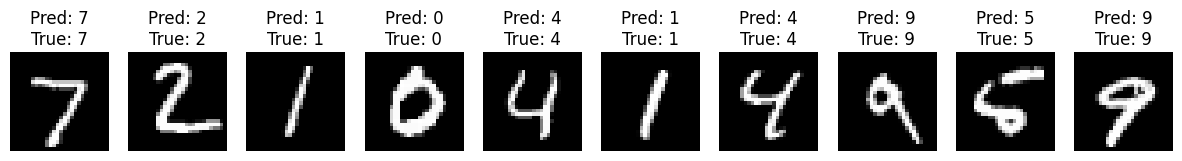

In [27]:
import matplotlib.pyplot as plt

# Function to plot images with predicted labels
def plot_sample_images(images, labels, predictions, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predictions[i]}\nTrue: {labels[i]}")
        plt.axis('off')
    plt.show()

# Visualize sample predictions
plot_sample_images(X_test[:10].reshape(10, 28, 28), y_test[:10], sample_predictions)


In [28]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the confusion matrix
def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
